In [1]:
#! conda install matplotlib --y
from classo import *

import numpy as np
import matplotlib.pyplot as plt

#### To generate the data :

In [2]:
m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=0)

#### To define the problem :

In [3]:
problem = classo_problem(X,y)

#### solve the problem with its default parameters :

In [4]:
problem.solve()

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Stability selection
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



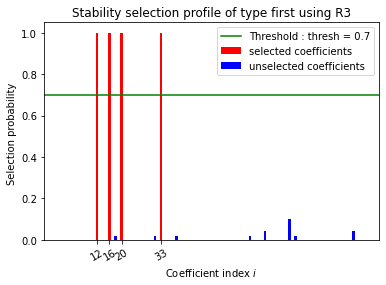

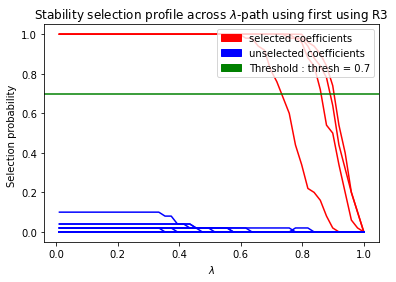

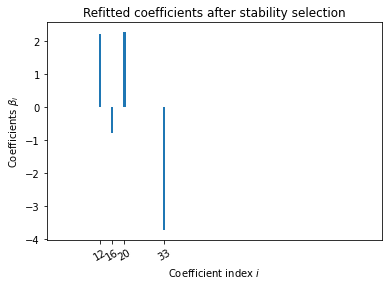


 STABILITY SELECTION : 
   Selected variables :  12    16    20    33    
   Running time :  1.072s



In [5]:
print(problem)

print(problem.solution)

#### Zarr storage

In [6]:
import zarr
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   ├── label (100,) <U2
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   ├── LAMfixedparameters
 │   ├── PATHparameters
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 │       └── formulation
 └── solution
     └── StabSel
         ├── distribution (100,) float64
         ├── distribution_path (50, 100) float64
         ├── label (100,) <U2
         ├── lambdas_path (50,) float64
         ├── refit (100,) float64
         ├── selected_param (100,) bool
         └── to_label (100,) bool

#### To plot the solutions, as graphs :

#### To solve a problem different than the default parameters :

In [52]:
m,d,d_nonzero,k,sigma =100,100,5,0,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=4)
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = False
problem.formulation.concomitant             = False

problem.model_selection.CV                  = False
problem.model_selection.LAMfixed            = False
problem.model_selection.PATH                = True
problem.model_selection.StabSel             = False
problem.model_selection.StabSelparameters.method = 'first'
problem.model_selection.CVparameters.seed = 1

problem.model_selection.LAMfixedparameters.rescaled_lam = False
problem.model_selection.LAMfixedparameters.lam = 120.

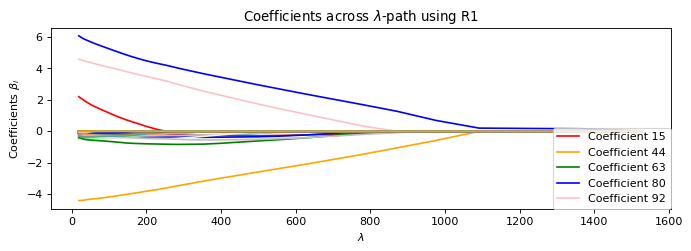


 PATH COMPUTATION : 
   Running time :  1.101s
[1528.378474365936, 1365.9991360385284, 1220.8714470622967, 1091.1625424409829, 975.2342860431528, 871.6225820458261, 779.0188843900183, 696.2536707250687, 622.2816721287992, 556.168672064815, 497.0797078566638, 444.2685256714188, 397.06815583622733, 354.88248946041745, 317.17874998157373, 283.480764556276, 253.36295031769717, 226.44493955054395, 202.38677590291627, 180.8846209664784, 161.66691700193786, 144.49095734764, 129.1398211978476, 115.41963403901855, 103.15711914523708, 92.19740920983358, 82.40209047557511, 73.64745466210614, 65.8229366136615, 58.829717935593315, 52.579478984581705, 46.99328345100601, 42.0005814465026, 37.53831850637656, 33.550139254167675, 29.985675671190148, 26.799910982369802, 23.952611124685006, 21.407816618040556, 19.13338842124589]


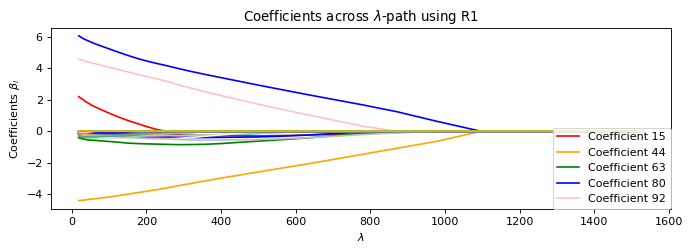


 PATH COMPUTATION : 
   Running time :  0.04s
[1528.378474365936, 1365.9991360385284, 1220.8714470622967, 1091.1625424409829, 975.2342860431528, 871.6225820458261, 779.0188843900183, 696.2536707250687, 622.2816721287992, 556.168672064815, 497.0797078566638, 444.2685256714188, 397.06815583622733, 354.88248946041745, 317.17874998157373, 283.480764556276, 253.36295031769717, 226.44493955054395, 202.38677590291627, 180.8846209664784, 161.66691700193786, 144.49095734764, 129.1398211978476, 115.41963403901855, 103.15711914523708, 92.19740920983358, 82.40209047557511, 73.64745466210614, 65.8229366136615, 58.829717935593315, 52.579478984581705, 46.99328345100601, 42.0005814465026, 37.53831850637656, 33.550139254167675, 29.985675671190148, 26.799910982369802, 23.952611124685006, 21.407816618040556, 19.13338842124589]


In [53]:
problem.model_selection.PATHparameters.numerical_method = 'DR'
problem.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem.solve()
print(problem.solution.PATH)
print(problem.solution.PATH.LAMBDAS)
problem.model_selection.PATHparameters.numerical_method = 'Path-Alg'
problem.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'
problem.solve()
print(problem.solution.PATH)
print(problem.solution.PATH.LAMBDAS)


#### To see information about the problem

In [9]:
problem

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.134
     lam : theoretical
     theoretical_lam = 0.1994
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0

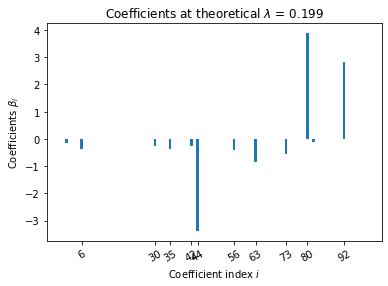

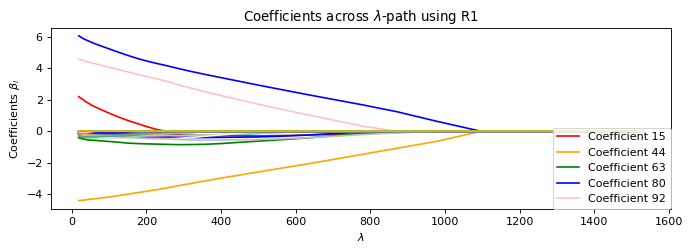


 LAMBDA FIXED : 
   Selected variables :  6    30    35    42    44    56    63    73    80    92    
   Running time :  0.013s

 PATH COMPUTATION : 
   Running time :  0.185s

In [10]:
problem.solution

#### To plot the solutions, as graphs :

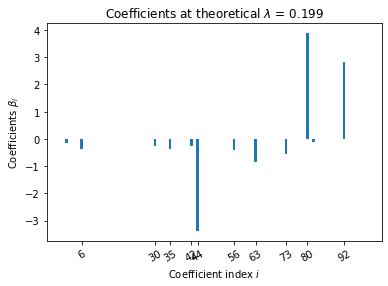

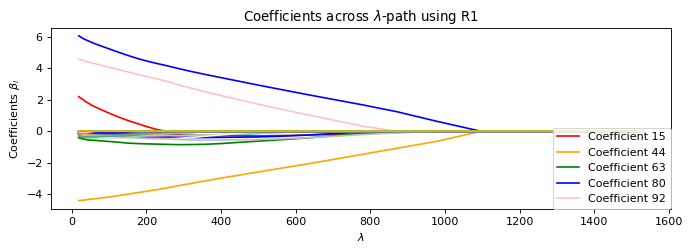


 LAMBDA FIXED : 
   Selected variables :  6    30    35    42    44    56    63    73    80    92    
   Running time :  0.013s

 PATH COMPUTATION : 
   Running time :  0.185s

In [11]:
problem.solution

In [12]:
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   ├── label (100,) <U2
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   ├── LAMfixedparameters
 │   │   └── formulation
 │   ├── PATHparameters
 │   │   ├── formulation
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 └── solution
     ├── LAMfixed
     │   ├── beta (100,) float64
     │   ├── formulation
     │   ├── label (100,) <U2
     │   ├── refit (100,) float64
     │   └── selected_param (100,) bool
     └── PATH
         ├── BETAS (40, 100) float64
         ├── LAMBDAS (40,) float64
         ├── formulation
         └── label (100,) <U2

In [13]:
problem.solution.CV.graphic(ratio_mse_max = 1000.)

AttributeError: 'str' object has no attribute 'graphic'

#### To show that the CV (also works for StabSel) depends only on the seed we choose :

In [ ]:
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution.CV

MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution.CV

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution.CV

b1, b2, b3 = solution1.beta, solution2.beta, solution3.beta 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))